In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
#import wbgapi as wb

Country ::      Aruba Africa Eastern and Southern Afghanistan Africa Western and Central  \
                                                                                
1960   NaN                         NaN         NaN                        NaN   
1961   NaN                         NaN         NaN                        NaN   
1962   NaN                         NaN         NaN                        NaN   
1963   NaN                         NaN         NaN                        NaN   
1964   NaN                         NaN         NaN                        NaN   

     Angola Albania Andorra Arab World United Arab Emirates Argentina  ...  \
                                                                       ...   
1960    NaN     NaN     NaN        NaN                  NaN       NaN  ...   
1961    NaN     NaN     NaN        NaN                  NaN       NaN  ...   
1962    NaN     NaN     NaN        NaN                  NaN       NaN  ...   
1963    NaN     NaN     NaN    

<AxesSubplot:title={'center':'Access To Electricity in 5 different countries'}>

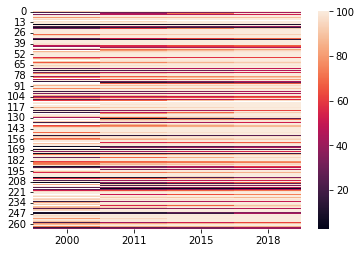

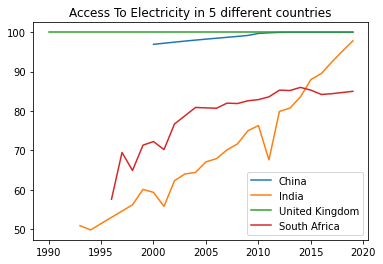

In [24]:
def get_year_country_df(filename):
    """method to create  two dataframes with year and country as columns.It accepts excel file and 
    and returns two dataframes"""
    df_year=''
    df_country=''
    data = pd.read_excel(filename, header=None,dtype=str,index_col=False)
    data.head()
    data.dropna(thresh=5)
    df = data[3:]
    headers = df.iloc[0]
    df1  = pd.DataFrame(df.values[1:], columns=headers)
    df1.columns.name = ''
    df_year = df1.drop(['Indicator Name','Indicator Code'] ,axis=1)
    df_year.columns
    #df_year
    # dataframe with country as columns#
    df_country=df_year.T
    headers1 = df_country.iloc[:1]
    headers1
    df_country.columns=df_country.iloc[0]
    df_country.columns.name = ''
    df_country = df_country[2:]#rows after country code row
    return df_year,df_country

#function to create dataframes with AccesstoElectricity indicator
year, country = get_year_country_df("AccesstoElectricity.xls")
print("Country ::" ,country.head())
print("Year :: " ,year.head())

print(sns.heatmap(year[["2000","2011","2015","2018"]].astype('float')))
#country = country[1:] 
country[["China", "India","United Kingdom","South Africa"]].astype('float').plot(title='Access To Electricity in 5 different countries')


data              Country Name                2014                2015  \
5                 Albania  12.756644440470414  13.454824150557778   
8    United Arab Emirates  21.568627450980394  21.630094043887148   
13              Australia  0.6306503606883124  0.6173463671905297   
70                  Spain  14.402889607946424  13.539856640264897   
184              Pakistan  51.279929383206444   51.73747306778631   

                   2016                2017                2018  
5      14.3014301430143  14.625622551170434  14.990447848146763  
8    21.834288692027098  21.834288692027098   21.40144073346431  
13   0.6266746837438194  0.6034902390025737  0.6402986946042714  
70   13.759770346878247  13.933546880401346  14.145419482054377  
184   50.55443822362342   49.23925087155096  53.223140495867774  


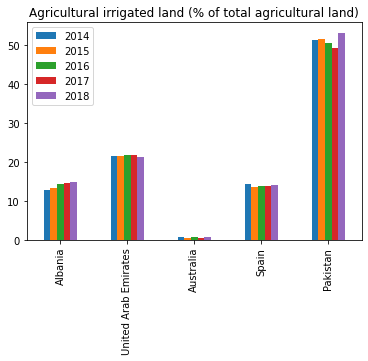

In [3]:
#call function to create dataframes with Agriculture Irrigated Land indicator
year_agri_irrig, country_agri_irrig = get_year_country_df("AgriIrrigatedLand.xls")

year_agri_irrig
#5 year data 2014 to 2018 Agricultural irrigated land 
data = year_agri_irrig[["Country Name","2014", "2015", "2016","2017","2018"]]
data
df2 = data.loc[(data["Country Name"] == "Albania") | (data["Country Name"] == "Spain") | 
         (data["Country Name"] == "Australia") | (data["Country Name"] == "Pakistan") | (data["Country Name"] == "United Arab Emirates")]
print("data",df2)
x=range(5)
df2.iloc[: , 1:].astype('float').plot.bar(title='Agricultural irrigated land (% of total agricultural land)')
plt.xticks(x, ['Albania','United Arab Emirates','Australia','Spain','Pakistan'], rotation='vertical')
plt.show()




       Country Name                2009                2010  \
13        Australia    5862.55194383105   5793.116025735586   
40            China  1778.4335186214564   1954.722556168961   
70            Spain    2757.69141158545  2742.8771822219073   
81   United Kingdom   3145.585662082845   3230.615983576554   
109           India   544.6265972936674   561.6534058698909   
119           Japan   3678.511132630987  3893.2666042008277   

                   2011                2012                2013  
13   5745.2321895446485   5575.287093278565   5468.391368795979  
40   2085.0830216314075   2149.602569063425  2204.2432990522575  
70    2689.684337213148   2683.367934807765  2512.1059192456805  
81    2972.153064529668   3042.859871038112   2987.700588787102  
109   577.9944262903107   599.1556197800442   605.7940377583726  
119  3610.8121690017447  3537.3631698125037   3567.629353838911  
Statistics for Australia
average:  5688.915724237166
std. deviations: 145.41061926023337
skewnes

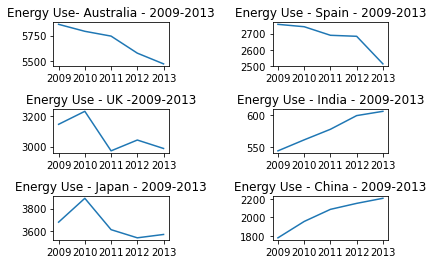

In [4]:
#call function to create dataframes with Energy Use indicator
year_energyuse, country_energyuse = get_year_country_df("Energyuse.xls")
year_energyuse.head()


def energy_stats(dist):
    """ Prints statistics details countrywise . Uses numpy and scipy.stats"""
    print("average: ", np.average(dist))
    print("std. deviations:", np.std(dist))
    print("skewness: ", stats.skew(dist))
    print("kurtosis: ", stats.kurtosis(dist))
    return


data_stats = year_energyuse[["Country Name","2009", "2010", "2011","2012","2013"]]
data_stats
df_stats = data_stats.loc[(data_stats["Country Name"] == "Australia") | (data_stats["Country Name"] == "India") | 
         (data_stats["Country Name"] == "United Kingdom") | (data_stats["Country Name"] == "Japan")
         | (data_stats["Country Name"] == "Spain") |  (data_stats["Country Name"] == "China")]
print(df_stats)

#Energy use - use of primary energy  statistics of 5 countries between 2009 and 2013
print("Statistics for Australia")
data_energy_aus = df_stats.iloc[0, 1:6].astype('float')
energy_stats(data_energy_aus)
print()

print("Statistics for China")
data_energy_chn = df_stats.iloc[1, 1:6].astype('float')
energy_stats(data_energy_chn)
print()

print("Statistics for Spain")
data_energy_spain = df_stats.iloc[2, 1:6].astype('float')
energy_stats(data_energy_chn)
print()

print("Statistics for United Kingdom")
data_energy_uk = df_stats.iloc[3, 1:6].astype('float')
energy_stats(data_energy_uk)
print()

print("Statistics for India")
data_energy_ind = df_stats.iloc[4, 1:6].astype('float')
energy_stats(data_energy_ind)
print()

print("Statistics for Japan")
data_energy_japan = df_stats.iloc[5, 1:6].astype('float')
energy_stats(data_energy_japan)
print()

plt.figure()
plt.subplots_adjust(wspace=0.9,hspace=1)
plt.subplot(3, 2, 1)
plt.plot(data_energy_aus,label="Aus-2009 to 2013")
plt.title("Energy Use- Australia - 2009-2013")


plt.subplot(3, 2, 2)
plt.plot(data_energy_spain,label="Spain-2009 to 2013")
plt.title("Energy Use - Spain - 2009-2013")

plt.subplot(3, 2, 3)
plt.plot(data_energy_uk,label="UK-2009 to 2013")
plt.title("Energy Use - UK -2009-2013")

plt.subplot(3, 2, 4)
plt.plot(data_energy_ind,label="India-2009 to 2013")
plt.title("Energy Use - India - 2009-2013")

plt.subplot(3, 2, 5)
plt.plot(data_energy_japan,label="Japan-2009 to 2013")
plt.title("Energy Use - Japan - 2009-2013")

plt.subplot(3, 2, 6)
plt.plot(data_energy_chn,label="China-2009 to 2013")
plt.title("Energy Use - China - 2009-2013")
plt.show()


#energy_stats(df_stats.iloc[1, 200].astype('float'))

       Country Name     2009     2010     2011     2012     2013
13        Australia   394950   387350   385770   385770   379270
40            China  7715110  8470570  9278250  9533210  9936680
70            Spain   287490   273250   274400   269270   242800
81   United Kingdom   465120   481790   444420   467080   453060
109           India  1568530  1665310  1760800  1908570  1966810
119           Japan  1101210  1156080  1212170  1252220  1260900
Pearson's correlation coefficients
Energy use vs. co2 emission coefficient- Australia 2009-2013 0.8767080455477401 probability 0.050996068087881465

Energy use vs. co2 emission coefficient- India 2009-2013 0.997897512511339 probability 0.000115690307505557

Energy use vs. co2 emission coefficient- UK 2009-2013 0.9107033404593425 probability 0.03159965651946974

Energy use vs. co2 emission coefficient- Japan 2009-2013 -0.6454077112586286 probability 0.239529650217415

Spearman's correlation coefficients
Energy use vs. co2 emission coefficie

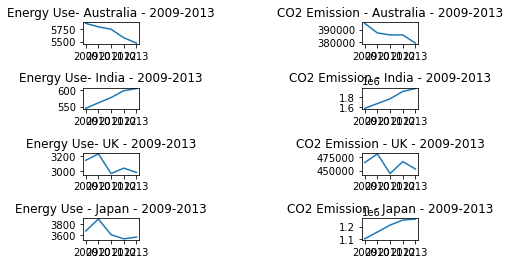

In [5]:
year_co2emission, country_co2emission = get_year_country_df("co2emission.xls")
year_co2emission.head()

data_emisson = year_co2emission[["Country Name","2009", "2010", "2011","2012","2013"]]
data_emisson


df_emisson = data_emisson.loc[(data_emisson["Country Name"] == "Australia") | (data_emisson["Country Name"] == "India") | 
         (data_emisson["Country Name"] == "United Kingdom") | (data_emisson["Country Name"] == "Japan")
         | (data_emisson["Country Name"] == "Spain") |  (data_emisson["Country Name"] == "China")]
print(df_emisson)

data_emission_aus = df_emisson.iloc[0, 1:6].astype('int')
data_emission_china = df_emisson.iloc[1, 1:6].astype('int')
data_emission_spain = df_emisson.iloc[2, 1:6].astype('int')
data_emission_uk = df_emisson.iloc[3, 1:6].astype('int')
data_emission_ind = df_emisson.iloc[4, 1:6].astype('int')
data_emission_japan = df_emisson.iloc[5, 1:6].astype('int')
#data_emission_aus

print("Pearson's correlation coefficients")
r, p = stats.pearsonr(data_energy_aus, data_emission_aus)
print("Energy use vs. co2 emission coefficient- Australia 2009-2013", r, "probability", p)
print()

r, p = stats.pearsonr(data_energy_ind, data_emission_ind)
print("Energy use vs. co2 emission coefficient- India 2009-2013", r, "probability", p)
print()

r, p = stats.pearsonr(data_energy_uk, data_emission_uk)
print("Energy use vs. co2 emission coefficient- UK 2009-2013", r, "probability", p)
print()

r, p = stats.pearsonr(data_energy_japan, data_emission_japan)
print("Energy use vs. co2 emission coefficient- Japan 2009-2013", r, "probability", p)
print()






print("Spearman's correlation coefficients")
r, p = stats.spearmanr(data_energy_aus, data_emission_aus)
print("Energy use vs. co2 emission coefficient- Australia 2009-2013", r, "probability", p)

r, p = stats.spearmanr(data_energy_ind, data_emission_ind)
print("Energy use vs. co2 emission coefficient- India 2009-2013", r, "probability", p)
print()

r, p = stats.spearmanr(data_energy_uk, data_emission_uk)
print("Energy use vs. co2 emission coefficient- UK 2009-2013", r, "probability", p)
print()



r, p = stats.spearmanr(data_energy_japan, data_emission_japan)
print("Energy use vs. co2 emission coefficient- Japan 2009-2013", r, "probability", p)
print()

#print(data_energy_aus.round(2))


plt.figure()
plt.subplots_adjust(wspace=4,hspace=2)
plt.subplot(4, 2, 1)
plt.plot(data_energy_aus,label="Aus-2009-2013 Energy use")
plt.title("Energy Use- Australia - 2009-2013")


plt.subplot(4, 2, 2)
plt.plot(data_emission_aus,label="Aus-2009-2013 CO2 Emission")
plt.title("CO2 Emission - Australia - 2009-2013")

plt.subplot(4, 2, 3)
plt.plot(data_energy_ind,label="Ind-2009-2013 Energy use")
plt.title("Energy Use- India - 2009-2013")


plt.subplot(4, 2, 4)
plt.plot(data_emission_ind,label="Ind-2009-2013 CO2 Emission")
plt.title("CO2 Emission - India - 2009-2013")



plt.subplot(4, 2, 5)
plt.plot(data_energy_uk,label="UK-2009-2013 Energy use")
plt.title("Energy Use- UK - 2009-2013")


plt.subplot(4, 2, 6)
plt.plot(data_emission_uk,label="UK-2009-2013 CO2 Emission")
plt.title("CO2 Emission - UK - 2009-2013")



plt.subplot(4, 2, 7)
plt.plot(data_energy_japan,label="Japan-2009-2013Energy use")
plt.title("Energy Use - Japan - 2009-2013")



plt.subplot(4, 2, 8)
plt.plot(data_emission_japan,label="Japan-2009-2013 CO2 Emission")
plt.title("CO2 Emission - Japan - 2009-2013")
plt.show()




          United States              Aruba              India  \
                                                                
2010  0.829616674709795   0.20973141399036   1.35033831370532   
2011  0.726786704810745  0.377979489354876   1.28851296178524   
2012  0.733599941250847  0.503385467824644   1.23148489388617   
2013  0.692860276624581  0.583290430309314   1.18290421490412   
2014  0.733361519937424  0.590508188771418   1.14567340150608   
2015   0.73621730882542  0.541048337127457   1.11689591278599   
2016  0.724676067451429  0.502859513587608   1.09045932094686   
2017   0.63264399508256  0.471874002595904   1.06335942989132   
2018  0.526435395564053  0.459265888430662   1.03782784787162   
2019  0.455381285963537  0.437414675818993   1.01326124930492   
2020  0.350911063312921  0.428016948088116  0.989413800188014   

         United Kingdom               Japan          Zimbabwe  
                                                               
2010  0.783888646646516  0

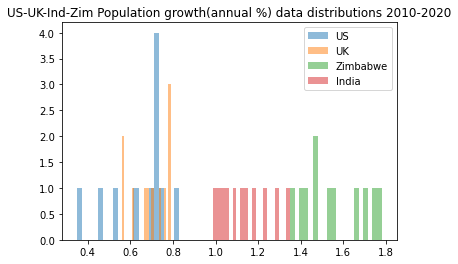

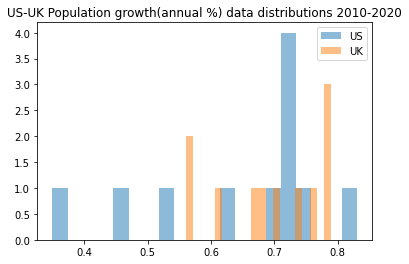

In [21]:
from scipy.stats import ks_2samp

year_pop_growth, country_pop_growth = get_year_country_df("popgrowth.xls")
country_pop_growth.head()



df2 = country_pop_growth.iloc[50:61,:]
df2
#df3 = [df2['Aruba','India','United Kingdom','Japan','Zimbabwe']]

df3 = df2[['United States','Aruba', 'India','United Kingdom','Japan','Zimbabwe']]
df3     
print(df3)

# KS test for two samples drawn from the same distribution
us_data = df3[["United States"]].values.astype('float').round(2).flatten()
#print(us_data)
uk_data = df3[["United Kingdom"]].values.astype('float').round(2).flatten()
japan_data = df3[["Japan"]].values.astype('float').round(2).flatten()
zim_data = df3[["Zimbabwe"]].values.astype('float').round(2).flatten()
ind_data = df3[["India"]].values.astype('float').round(2).flatten()
#print("US-India population growth data distributions")
#d, p = stats.ks_2samp(df3[['United States']].astype('float').round(2), df3[['Japan']].astype('float').round(2))

d, p = ks_2samp(uk_data, us_data)
print("max. distance uk-us", d, "probability", p)

d, p = ks_2samp(zim_data, ind_data)
print("max. distance japan-zim", d, "probability", p)
##print("us",us_data)

plt.figure()
plt.hist(us_data, label="US", bins=20,alpha=0.5)
plt.hist(uk_data, label="UK", bins=20, alpha=0.5)
plt.hist(zim_data, label="Zimbabwe", bins=20,alpha=0.5)
plt.hist(ind_data, label="India", bins=20, alpha=0.5)
plt.title("US-UK-Ind-Zim Population growth(annual %) data distributions 2010-2020")
plt.legend()
plt.show()


plt.figure()
plt.hist(us_data, label="US", bins=20,alpha=0.5)
plt.hist(uk_data, label="UK", bins=20, alpha=0.5)
plt.title("US-UK Population growth(annual %) data distributions 2010-2020")
plt.legend()
plt.show()



